In [1]:
import os
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

2025-01-23 12:17:15.646552: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 12:17:15.652803: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 12:17:15.665387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737649035.687398   10613 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737649035.691867   10613 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 12:17:15.710371: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
len(y_train)

60000

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
len(y_test)

10000

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

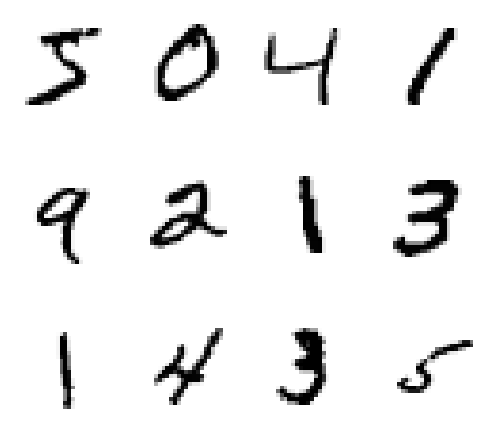

In [9]:
plt.figure(figsize = (5,5))
for k in range(12):
    plt.subplot(3, 4, k + 1)
    plt.imshow(X_train[k], cmap = 'Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [11]:
X_train /= 255
X_test /= 255

In [12]:
n_classes = 10
inputs = Input(shape = (28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs = outputs)
model.summary()

2025-01-23 12:17:19.947089: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
                    epochs = 5,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/5


2025-01-23 12:17:20.335118: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 115ms/step - accuracy: 0.8253 - loss: 0.6212 - val_accuracy: 0.9772 - val_loss: 0.0814
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.9767 - loss: 0.0750 - val_accuracy: 0.9847 - val_loss: 0.0566
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.9860 - loss: 0.0437 - val_accuracy: 0.9858 - val_loss: 0.0492
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 113ms/step - accuracy: 0.9897 - loss: 0.0338 - val_accuracy: 0.9876 - val_loss: 0.0434
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.9922 - loss: 0.0271 - val_accuracy: 0.9885 - val_loss: 0.0417


In [15]:
history.history

{'accuracy': [0.9217291474342346,
  0.9791458249092102,
  0.9858124852180481,
  0.989104151725769,
  0.991812527179718],
 'loss': [0.27334946393966675,
  0.06480735540390015,
  0.04370465502142906,
  0.034465499222278595,
  0.026706477627158165],
 'val_accuracy': [0.9772499799728394,
  0.984749972820282,
  0.9858333468437195,
  0.987583339214325,
  0.9884999990463257],
 'val_loss': [0.08140265941619873,
  0.05657091736793518,
  0.04917549714446068,
  0.04343940690159798,
  0.041703321039676666]}

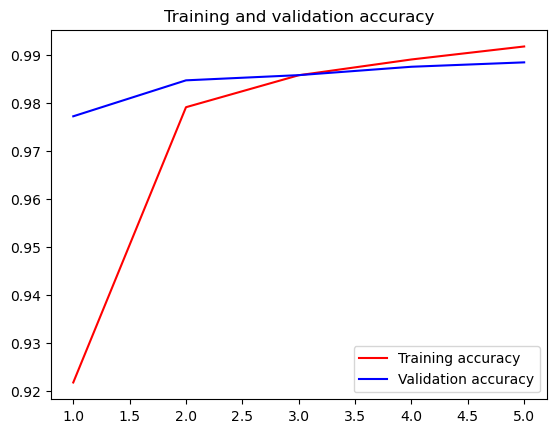

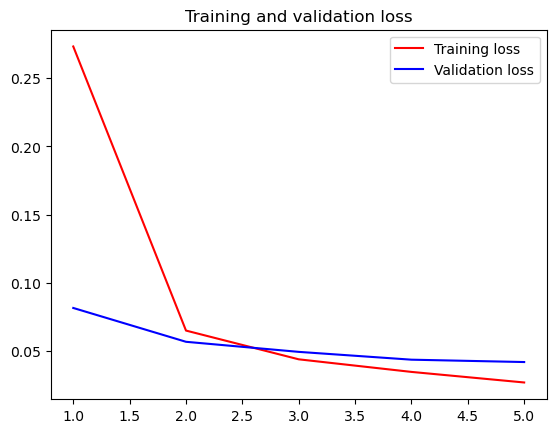

In [16]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label = "Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [17]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [18]:
predictions[0]

array([2.20277951e-09, 1.47759906e-07, 9.47140336e-07, 1.55219436e-06,
       3.42106421e-12, 7.31469063e-09, 6.70321652e-16, 9.99996364e-01,
       1.17194766e-07, 8.77882655e-07], dtype=float32)

In [19]:
predictions[0].argmax()

7

In [20]:
y_test[0]

7

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9869 - loss: 0.0399


In [22]:
test_acc, test_loss

(0.9898999929428101, 0.0300456490367651)

In [23]:
print(f"test_acc: {test_acc}")

test_acc: 0.9898999929428101
